### DATASET link : https://www.kaggle.com/mlg-ulb/creditcardfraud/code?datasetId=310&sortBy=voteCount

# Credit Card Fraud Detection Using Machine Learning Algorithms

#### The goal of this project is to track the pattern of all the transactions and if any pattern is abnormal then the transaction should be classified as fraud.

#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
import sklearn.metrics as metrics


#### Import CSV file

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
dataset.drop('Time',inplace=True,axis = 1)

In [5]:
# check the shape of dataset
dataset.shape

(284807, 30)

so we have a total of 284807 transaction    

lets check for nan values

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.shape

(284807, 30)

Thus we can see no data has been dropped

##### we need to check for any duplicate transaction taking place and remove it if present to bring down the runtime of the model.

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.shape

(275663, 30)

In [10]:
284807-275663

9144

Thus we removed 9144 duplicates form the dataset.

<AxesSubplot:>

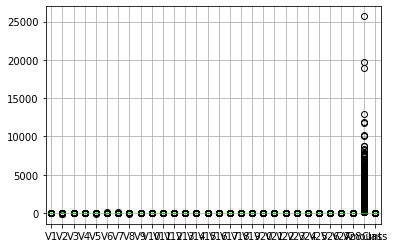

In [11]:
dataset.boxplot(figsize= (15,15))

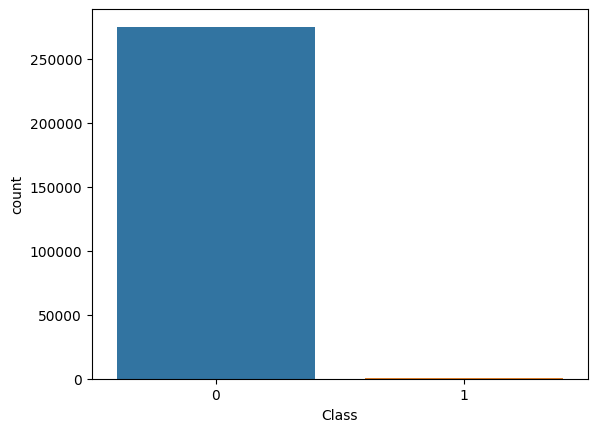

In [12]:
sns.countplot('Class',data = dataset);

In [13]:
# lets check for number of normal and fraud transaction
fraud = len(dataset[dataset['Class'] == 1])
normal = len(dataset[dataset['Class'] == 0])
percent_normal = normal/len(dataset)*100
percent_fraud = fraud/len(dataset)*100

In [14]:
print('Number of Fraud Transactions are: {}'.format(fraud))
print('Number of Normal Transactions are: {}'.format(normal))
print(' ')
print('Percentage of Fraud Transactions are: {:.2f}%'.format(percent_fraud))
print('Percentage of Normal Transactions are: {:.2f}%'.format(percent_normal))


Number of Fraud Transactions are: 473
Number of Normal Transactions are: 275190
 
Percentage of Fraud Transactions are: 0.17%
Percentage of Normal Transactions are: 99.83%


In [15]:
X = dataset.drop(['Class'],axis=1)
y = dataset['Class']

In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
# Since we have imbalanced Dataset we need to balance it for the model
# we will be using Adasyn method to balance the dataset

In [18]:
#pip install -U imbalanced-learn

In [19]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN 

In [20]:
# X, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000,
# random_state=10)
print('Original dataset shape {}'.format(Counter(y)))

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 275190, 1: 473})
Resampled dataset shape Counter({0: 275190, 1: 275153})


In [21]:
X_res.shape

(550343, 29)

In [22]:
y_res.shape

(550343,)

#### now lets do the train test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42,stratify= y_res)

In [24]:
normal_res = len(y_train[y_train == 0])
fraud_res = len(y_train[y_train == 1])

In [25]:
print('Number of normal transaction in y_train are: {}'.format(normal_res))
print('Number of fraud transaction in y_train are: {}'.format(fraud_res))

Number of normal transaction in y_train are: 192633
Number of fraud transaction in y_train are: 192607


#### thus we can see both the class type are equally distributed in the y_train set

In [26]:
# since most of our columns are scaled we need to scale the amount variable

# We will use RobustScaler as it is less prone to outliers since it uses median to scale the data and median is not affected by outliers(inshort it preserves the outliers) 
# and in case of standardscaler it uses mean to scale the data.

from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [27]:
X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.transform(X_test['Amount'].values.reshape(-1,1))

In [28]:
X_test.drop(['Amount'], axis=1, inplace=True)
X_train.drop(['Amount'], axis=1, inplace=True)

In [29]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
44317,0.772709,-1.025386,0.929081,0.169100,-0.948135,0.925256,-0.712387,0.447821,0.949021,-0.440317,...,0.180819,-0.031582,-0.167645,-0.010323,-0.210027,-0.106996,0.968217,-0.035685,0.024674,0.781763
338860,1.069694,0.414037,0.835694,2.686716,-0.150728,0.469888,-0.269941,0.271835,-0.412157,0.404350,...,-0.179277,-0.131110,-0.194169,0.005442,0.099343,0.409446,-0.029727,0.031361,0.024165,-0.188717
222199,-2.574795,-4.661964,1.170258,0.687780,2.734087,-1.935902,-3.118427,0.653686,-0.053852,0.895734,...,0.607934,0.567670,0.911813,1.354200,-0.490171,-2.100024,-0.948017,0.322527,0.474674,0.473540
172293,-0.278091,0.780809,-1.671187,-1.656611,3.299292,3.069026,0.325818,0.835062,-0.320507,-0.684068,...,0.057393,0.188760,0.561639,-0.278189,0.664895,0.040831,0.661513,0.151824,0.105088,-0.178080
396026,-0.712121,0.426156,-0.536057,-0.473351,0.633297,0.705702,-1.233379,-2.530466,-2.042679,0.167478,...,0.858044,-0.994728,1.147854,-0.150243,-1.371209,0.003140,0.216353,-0.057642,0.156686,-0.022474


In [30]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
366679,1.094302,1.014509,-0.489611,2.722429,0.590799,-0.296853,0.126198,0.159736,-1.021433,-0.248415,...,-0.162205,-0.057717,-0.200627,-0.071817,-0.201100,0.437515,0.063724,0.023372,0.063353,-0.189660
491377,1.003185,0.751716,-0.044731,1.567057,0.706165,-0.206609,0.555509,-0.179316,-0.644470,0.304480,...,-0.111751,-0.036017,-0.013421,-0.060858,-0.146153,0.183482,-0.339893,0.053561,0.046590,-0.191954
398986,-1.081976,1.098430,-0.291730,1.356158,1.776910,-2.111472,0.513282,-0.096488,-0.156827,-2.509903,...,-0.171462,-0.335956,-0.839138,-0.350678,0.244728,0.465507,-0.504183,0.009518,0.134755,-0.190600
247110,-0.337873,-0.978218,0.876708,-2.555642,-0.111509,-0.554171,-0.533899,-0.020514,-1.868679,0.782140,...,-0.213691,-0.081995,0.049199,-0.088177,-0.810271,-0.242932,-0.149331,0.142944,0.156400,-0.056666
402242,0.097301,1.350773,-1.013020,2.018325,1.667562,-0.682696,0.420174,0.063537,-0.298347,-2.191639,...,0.173418,-0.335607,-0.742113,-0.222923,-0.915267,0.381526,-0.201142,0.108193,0.107448,-0.190600


### Lets build the machine learning model 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#### Due to the length of dataset we will using simple Random forest classifier & Logistic Regression without hyperparameter tuning

In [33]:
classifiers1 =  RandomForestClassifier()

In [34]:
skf = StratifiedKFold(n_splits=5)
classifiers1.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
training_score = cross_val_score(classifiers1, X_train, y_train, cv=skf)
print("Classifiers: ", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  100.0 % accuracy score


In [36]:
y_pred = classifiers1.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, fbeta_score

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[82534,    23],
       [    0, 82546]], dtype=int64)

In [39]:
normal_res1 = len(y_test[y_test == 0])
fraud_res1 = len(y_test[y_test == 1])

In [40]:
normal_res1, fraud_res1

(82557, 82546)

In [41]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True negative = ', cm[0][0])
    print('False negative = ', cm[1][0])
    print('False positive = ', cm[0][1])
    print('True positive = ', cm[1][1])

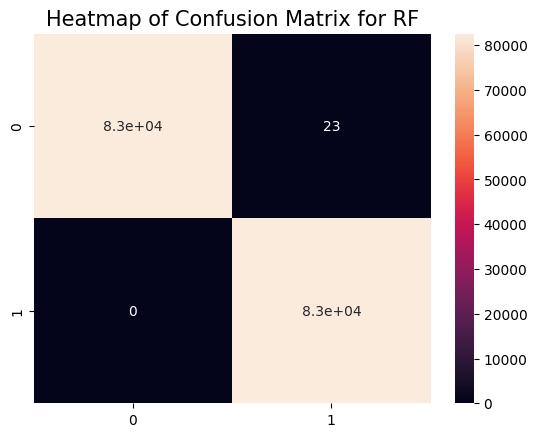

In [42]:
plt.title('Heatmap of Confusion Matrix for RF', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       1.00      1.00      1.00     82546

    accuracy                           1.00    165103
   macro avg       1.00      1.00      1.00    165103
weighted avg       1.00      1.00      1.00    165103



In [44]:
accuracy_score(y_test, y_pred)

0.9998606930219318

In [45]:
precision_score(y_test, y_pred)

0.9997214450944059

In [46]:
recall_score(y_test, y_pred)

1.0

In [47]:
print_confusion_matrix(y_test, y_pred)

True negative =  82534
False negative =  0
False positive =  23
True positive =  82546


In [48]:
fb_rf = fbeta_score(y_test, y_pred, beta=1)
fb_rf

0.9998607031462919

## Logistic Regression

In [51]:
clf_lr = LogisticRegression()

In [52]:
skf = StratifiedKFold(n_splits=5)
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
training_score_lr = cross_val_score(clf_lr, X_train, y_train, cv=skf)
print("Classifiers: ", round(training_score_lr.mean(), 2) * 100, "% accuracy score")

Classifiers:  92.0 % accuracy score


In [54]:
y_pred_lr = clf_lr.predict(X_test)

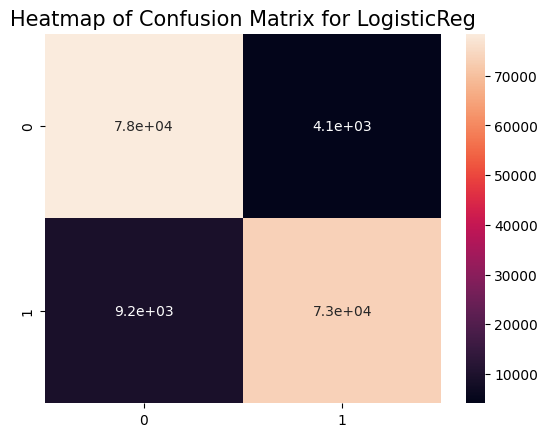

In [55]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.title('Heatmap of Confusion Matrix for LogisticReg', fontsize = 15)
sns.heatmap(cm_lr, annot = True)
plt.show()

In [56]:
print_confusion_matrix(y_test, y_pred_lr)

True negative =  78476
False negative =  9196
False positive =  4081
True positive =  73350


In [57]:
accuracy_score(y_test,y_pred_lr)

0.9195835327038273

In [58]:
precision_score(y_test,y_pred_lr)

0.9472950110420891

In [59]:
recall_score(y_test,y_pred_lr)

0.888595449809803

In [61]:
fb_lr = fbeta_score(y_test, y_pred_lr, beta=1)
fb_lr

0.9170068197303363

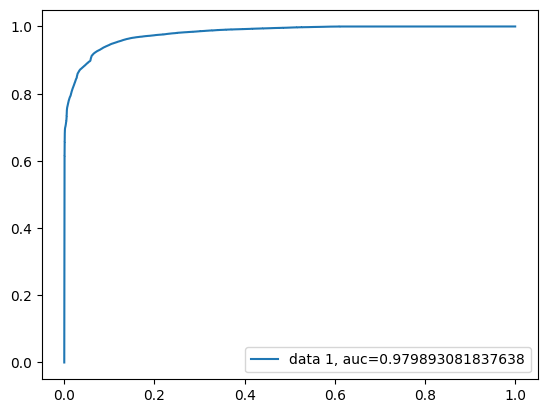

In [62]:
y_pred_proba = clf_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [63]:
import scikitplot as skplt #to make things easy


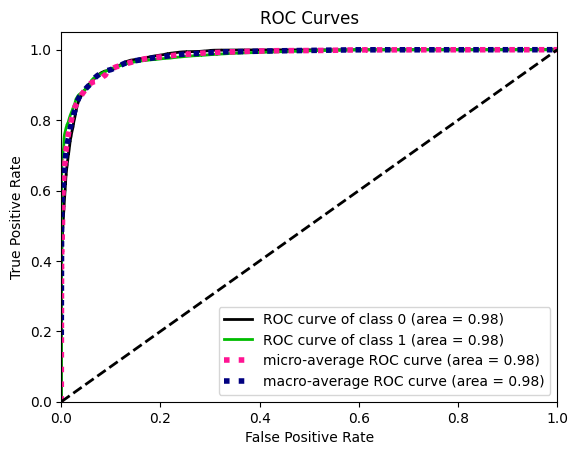

In [64]:
y_pred_prob = clf_lr.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_prob)
plt.show()

### Final Result

In [65]:
list = [fb_lr,fb_rf]


if (fb_lr == max(list)):
    print('The best F1 score is {:.7f} for Logistic Regression model.'.format(fb_lr))
else: 
    print('The best F1 score is {:.7f} for Random Forest model.'.format(fb_rf))

The best F1 score is 0.9998607 for Random Forest model.


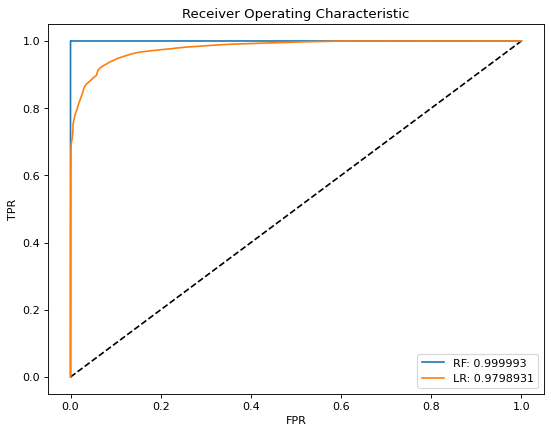

In [66]:
#ROC Curve

figure(figsize=(8, 6), dpi=80)
from sklearn.metrics import roc_curve
y_pred_prob1 = classifiers1.predict_proba(X_test)[:,1]

fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob1),7)

# y_pred_prob2 = clf_gnb.predict_proba(X_test)[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
# auc2 = round(metrics.roc_auc_score(y_test, y_pred_prob2),4)

y_pred_prob3 = clf_lr.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
auc3 = round(metrics.roc_auc_score(y_test, y_pred_prob3),7)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RF: "+str(auc))
# plt.plot(fpr2, tpr2, label= "GNB: "+str(auc2) )
plt.plot(fpr3, tpr3, label= "LR: "+str(auc3))

plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()